# Data Analytics Project - US STATE CRIME (1960-2019)
<br>
<br>

Authors: Agnieszka Welian, Katarzyna Wątorska
<br>
Date: 14-06-2022

<div style  = "text-align: justify">Crime statistics are made available for public review by the Unified Crime Reporting Statistics under the collaboration of the U.S. Department of Justice and the Federal Bureau of Investigation. The following data set has information on the crime rates and totals for each state across the United States that has been collected over the years 1960 - 2019. The crime reports are divided into two main categories: property crime and violent crime. Property crime refers to burglary, larceny, and motor related crime, while violent crime refers to assault, murder, rape and robbery. </div>

<div style='text-align:justify'>The main goal of this project is to describe the burglary rate and investigate the correlation between two types of crimes: burglary and larceny for the California state.
Thre created models may help in getting bigger insight into the phenomenon of these two crimes, the possible correlation between them and be a beginning of the task of forecasting crime occurrence, as well as evaluating police effectiveness. </div>

The data come from: https://think.cs.vt.edu/corgis/csv/state_crime/ and are a repost from the FBI website. Crime rates are reported per 100 000 inhabitants.

<div style='text-align:justify'>Two different models were chosen to model crime rates - normal distribution and linear model. 
Research provided the information that mean of the burglary rate is approximately equal to 1300 and its standard deviation is approximately equal to 600. Taking that into account, normal distribution with parameters $\mu$ = 1300, $\sigma$ = 600 has been introduced.
Linear model uses a predictor - larceny rate. Those before mentioned data are used to construct an alpha parameter $\alpha = normal(1300, 600)$. The beta and sigma have distributions: $\beta = lognormal(1, 0)$, $\sigma = exponential(0.005)$ (giving the uncertanity of 200).
The first model checks if it is possible to describe the given burglary rates with a normal distribution, whereas the second one tries to predict burglary rates basing on larceny rates.
<br>
    

</div> 
When it comes to the normal model we focus on it in the form:

$$ ~ \mathrm{Normal}(\mu,\sigma) $$
<br>
When it comes to the linear model we focus on it in the form:

$$ y ~ \mathrm{Normal}(\alpha+X\beta,\sigma) $$
<br>
Both models assume some uncertainty, but in case of linear models the mean $\mu$ is a value calculated from linear equations (Taylor simplified series) - in case of normal models, it is always generated.
<br>
In those models adding any other parameter does not make sense unless, instead of finding the correlation, the main goal was to predict the value. For properly using the models, some data is required. For the normal model, there is a need to know the mean and standard deviation. For the linear model, the above mentioned parameters are needed, too, but there is also an additional input which is the 'X' in the equation. It is a data from which our model depends.

</div>

# 1. Data preprocessing

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from cmdstanpy import CmdStanModel
import scipy.stats as stats
import arviz as az
import matplotlib as mpl
plt.style.context('seaborn-white')
mpl.rcParams['figure.dpi'] = 200

In [2]:
#read the data from the csv file
df = pd.read_csv("state_crime.csv")
df.head()

,State,Year,Data.Population,Data.Rates.Property.All,Data.Rates.Property.Burglary,Data.Rates.Property.Larceny,Data.Rates.Property.Motor,Data.Rates.Violent.All,Data.Rates.Violent.Assault,Data.Rates.Violent.Murder,...,Data.Rates.Violent.Robbery,Data.Totals.Property.All,Data.Totals.Property.Burglary,Data.Totals.Property.Larceny,Data.Totals.Property.Motor,Data.Totals.Violent.All,Data.Totals.Violent.Assault,Data.Totals.Violent.Murder,Data.Totals.Violent.Rape,Data.Totals.Violent.Robbery
0,Alabama,1960,3266740,1035.4,355.9,592.1,87.3,186.6,138.1,12.4,...,27.5,33823,11626,19344,2853,6097,4512,406,281,898
1,Alabama,1961,3302000,985.5,339.3,569.4,76.8,168.5,128.9,12.9,...,19.1,32541,11205,18801,2535,5564,4255,427,252,630
2,Alabama,1962,3358000,1067.0,349.1,634.5,83.4,157.3,119.0,9.4,...,22.5,35829,11722,21306,2801,5283,3995,316,218,754
3,Alabama,1963,3347000,1150.9,376.9,683.4,90.6,182.7,142.1,10.2,...,24.7,38521,12614,22874,3033,6115,4755,340,192,828
4,Alabama,1964,3407000,1358.7,466.6,784.1,108.0,213.1,163.0,9.3,...,29.1,46290,15898,26713,3679,7260,5555,316,397,992


In [3]:
#print column names
df.columns

Index(['State', 'Year', 'Data.Population', 'Data.Rates.Property.All',
       'Data.Rates.Property.Burglary', 'Data.Rates.Property.Larceny',
       'Data.Rates.Property.Motor', 'Data.Rates.Violent.All',
       'Data.Rates.Violent.Assault', 'Data.Rates.Violent.Murder',
       'Data.Rates.Violent.Rape', 'Data.Rates.Violent.Robbery',
       'Data.Totals.Property.All', 'Data.Totals.Property.Burglary',
       'Data.Totals.Property.Larceny', 'Data.Totals.Property.Motor',
       'Data.Totals.Violent.All', 'Data.Totals.Violent.Assault',
       'Data.Totals.Violent.Murder', 'Data.Totals.Violent.Rape',
       'Data.Totals.Violent.Robbery'],
      dtype='object')

In [4]:
#choose 1 state
california = df[df["State"] == "California"]

<div style = "text-align: justify">During basic analysis different crime rates were plotted on a scatter graph with x-axis displaying years. It is visible that the data seems to be flawed - most graphs have 3 points (for years 2013 - 2015) that do not fit the general trend line. Some data manipulation helped to determine that there must have occurred an intermingling of the data between different columns. For larceny, the records from the mentioned range of time, were found in the column of motor crime rates. For burglary, the data were fitted from the larceny column. Verification of the data from the FBI website confirmed that the hipothesis is correct. Thus, appropriate corrections have been introduced to the dataset. </div>

Text(0.5, 1.0, 'Data before processing')

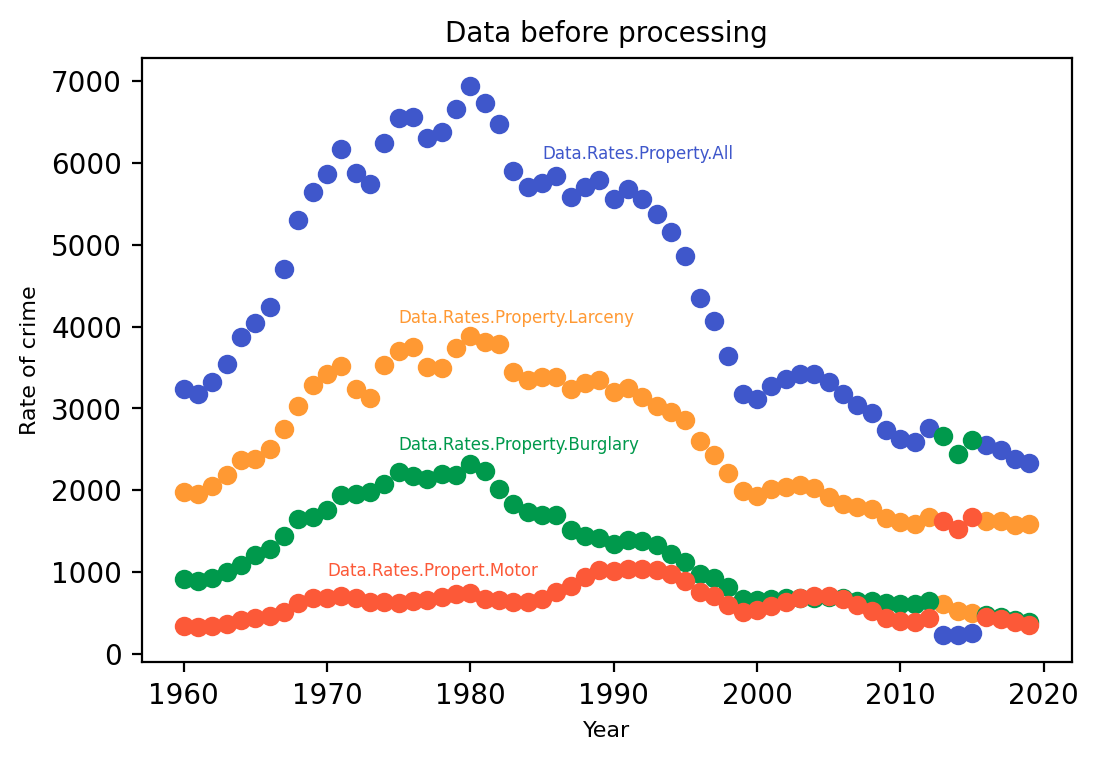

In [5]:
#plot raw data for all property crime rates, larceny, burglary and motor crime rates
fig,ax = plt.subplots()
ax.scatter(data=california, x = 'Year', y = 'Data.Rates.Property.All', color = '#3F57CB')
ax.scatter(data=california, x = 'Year', y = 'Data.Rates.Property.Larceny', color = '#FF9933')
ax.scatter(data=california, x = 'Year', y = 'Data.Rates.Property.Burglary', color = '#00994C')
ax.scatter(data=california, x = 'Year', y = 'Data.Rates.Property.Motor', color = '#FC5938')
ax.text(1985, 6050, 'Data.Rates.Property.All', fontsize = 6, color = '#3F57CB')
ax.text(1975, 4050, 'Data.Rates.Property.Larceny', fontsize = 6, color = '#FF9933')
ax.text(1975, 2500, 'Data.Rates.Property.Burglary', fontsize = 6, color = '#00994C')
ax.text(1970, 950, 'Data.Rates.Propert.Motor', fontsize = 6, color = '#FC5938')
plt.xlabel('Year', fontsize = 8)
plt.ylabel('Rate of crime', fontsize = 8)
plt.title("Data before processing", fontsize = 10)

Such a shape of the graph might be connected with the high unemployment rate in between 1970 and 1985. The inflation rate was also present during the time with the high rates of crime rates. After the World War II there was still a war called Cold War which was infuencing the economics and policy. In 2001 after the WTC attach, the people might have been encouraged to commit more crimes. The stable rate in 2010-2020 is still present probably due to the extreme poverty in which in 2016, 9 mln people were living. 

In [6]:
#corrections of dataset
for i in range(0, len(df)):
    if df['Data.Rates.Property.All'][i] <  df['Data.Rates.Property.Burglary'][i]:
        x = df['Data.Rates.Property.All'][i]
        df['Data.Rates.Property.All'][i] =  df['Data.Rates.Property.Burglary'][i]
        df['Data.Rates.Property.Burglary'][i] = x
    if df['Data.Rates.Property.Larceny'][i] <  df['Data.Rates.Property.Motor'][i]:
        y = df['Data.Rates.Property.Larceny'][i]
        df['Data.Rates.Property.Larceny'][i] =  df['Data.Rates.Property.Motor'][i]
        df['Data.Rates.Property.Motor'][i] = y
    if df['Data.Rates.Property.Burglary'][i] <  df['Data.Rates.Property.Motor'][i]:
        z = df['Data.Rates.Property.Burglary'][i]
        df['Data.Rates.Property.Burglary'][i] =  df['Data.Rates.Property.Motor'][i]
        df['Data.Rates.Property.Motor'][i] = z

/tmp/ipykernel_18611/3248312617.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Data.Rates.Property.All'][i] =  df['Data.Rates.Property.Burglary'][i]
/tmp/ipykernel_18611/3248312617.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Data.Rates.Property.Burglary'][i] = x
/tmp/ipykernel_18611/3248312617.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Data.Rates.Property.Larceny'][i] =  df['Data.Rates.Property.Motor']

Text(0.5, 1.0, 'Data after correction')

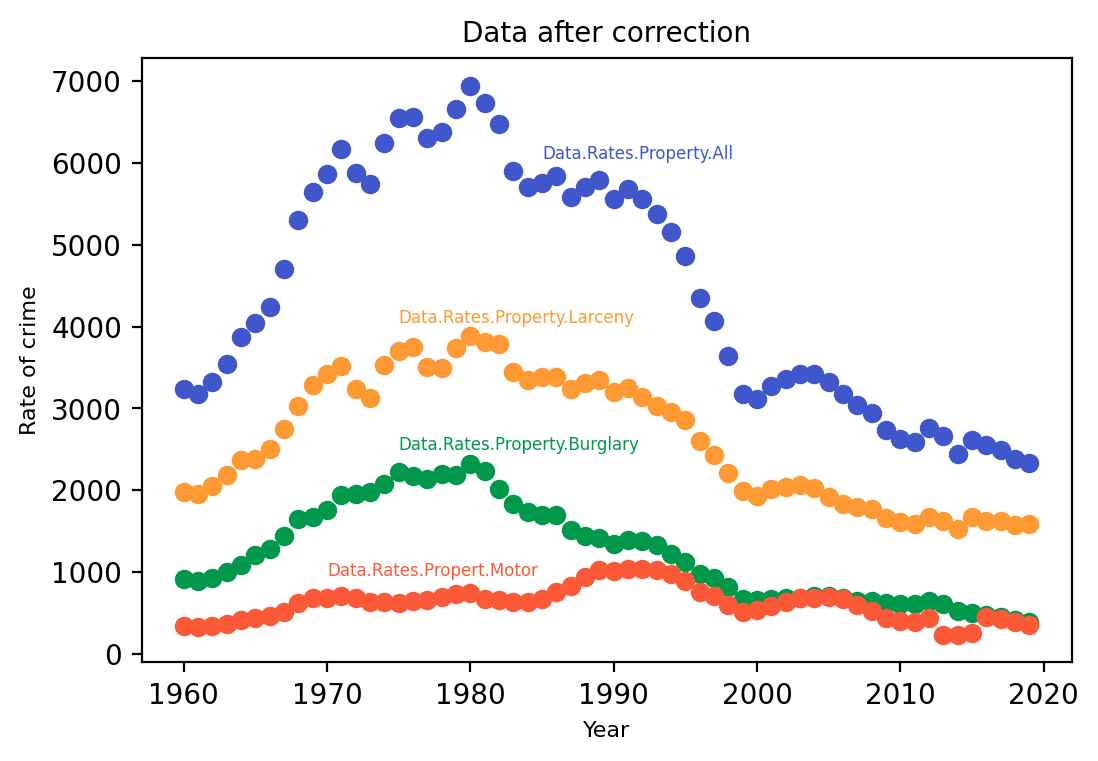

In [7]:
#plot corrected data
california = df[df["State"] == "California"]
fig,ax = plt.subplots()

ax.scatter(data=california, x = 'Year', y = 'Data.Rates.Property.All', color = '#3F57CB')
ax.scatter(data=california, x = 'Year', y = 'Data.Rates.Property.Larceny', color = '#FF9933')
ax.scatter(data=california, x = 'Year', y = 'Data.Rates.Property.Burglary', color = '#00994C')
ax.scatter(data=california, x = 'Year', y = 'Data.Rates.Property.Motor', color = '#FC5938')
ax.text(1985, 6050, 'Data.Rates.Property.All', fontsize = 6, color = '#3F57CB')
ax.text(1975, 4050, 'Data.Rates.Property.Larceny', fontsize = 6, color = '#FF9933')
ax.text(1975, 2500, 'Data.Rates.Property.Burglary', fontsize = 6, color = '#00994C')
ax.text(1970, 950, 'Data.Rates.Propert.Motor', fontsize = 6, color = '#FC5938')

plt.xlabel('Year', fontsize = 8)
plt.ylabel('Rate of crime', fontsize = 8)
plt.title("Data after correction", fontsize = 10)

The motor crime rates still seem to be not well-matched, but since this project does not concentrate on motor realted crimes, it is left so.

In [8]:
california.describe()

,Year,Data.Population,Data.Rates.Property.All,Data.Rates.Property.Burglary,Data.Rates.Property.Larceny,Data.Rates.Property.Motor,Data.Rates.Violent.All,Data.Rates.Violent.Assault,Data.Rates.Violent.Murder,Data.Rates.Violent.Rape,Data.Rates.Violent.Robbery,Data.Totals.Property.All,Data.Totals.Property.Burglary,Data.Totals.Property.Larceny,Data.Totals.Property.Motor,Data.Totals.Violent.All,Data.Totals.Violent.Assault,Data.Totals.Violent.Murder,Data.Totals.Violent.Rape,Data.Totals.Violent.Robbery
count,60.000000,6.000000e+01,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.00000,60.000000,60.000000,6.000000e+01,6.000000e+01,60.000000,60.000000,60.000000,60.000000,60.00000,60.000000,60.000000
mean,1989.500000,2.855579e+07,4475.756667,1228.918333,2620.975000,616.905000,617.291667,339.663333,7.89000,34.218333,224.545000,1.163731e+06,3.580828e+05,691070.750000,201472.483333,178274.266667,99361.366667,2207.50000,9654.166667,62802.366667
std,17.464249,7.628299e+06,1478.502570,594.524257,778.947315,207.456626,242.850555,152.225295,3.11365,10.450099,104.734474,4.012412e+05,1.865597e+05,203269.217232,119409.517507,79088.695892,51175.017672,870.82368,3161.458981,30578.344402
min,1960.000000,1.571720e+07,2331.200000,386.100000,1527.400000,232.300000,232.700000,119.600000,3.70000,17.400000,19.500000,8.902900e+04,1.431020e+05,197404.000000,53453.000000,37558.000000,18796.000000,605.00000,2859.000000,7464.000000
25%,1974.750000,2.111550e+07,3177.725000,674.300000,1922.125000,443.275000,440.800000,241.225000,4.87500,25.300000,147.475000,9.858202e+05,2.317542e+05,620181.750000,139242.500000,136046.000000,53445.500000,1744.25000,8280.000000,48528.250000
50%,1989.500000,2.941151e+07,4294.700000,1164.950000,2555.650000,635.600000,572.700000,319.050000,6.85000,34.150000,198.450000,1.185550e+06,3.209860e+05,695103.000000,168435.500000,180857.000000,99075.500000,2188.50000,9872.500000,62310.000000
75%,2004.250000,3.592007e+07,5760.975000,1708.150000,3346.200000,696.875000,801.500000,410.650000,10.60000,41.650000,311.450000,1.492620e+06,4.356690e+05,859776.750000,241611.000000,210350.250000,136183.250000,2772.25000,11997.750000,84399.500000
max,2019.000000,3.955704e+07,6939.500000,2316.500000,3880.000000,1038.900000,1119.700000,641.600000,14.50000,58.200000,424.100000,1.726391e+06,1.024914e+06,986120.000000,656517.000000,345624.000000,198045.000000,4096.00000,15505.000000,130897.000000


In [9]:
california['Data.Rates.Property.Burglary'].describe()


count      60.000000
mean     1228.918333
std       594.524257
min       386.100000
25%       674.300000
50%      1164.950000
75%      1708.150000
max      2316.500000
Name: Data.Rates.Property.Burglary, dtype: float64

In [10]:
california['Data.Rates.Property.Larceny'].describe()

count      60.000000
mean     2620.975000
std       778.947315
min      1527.400000
25%      1922.125000
50%      2555.650000
75%      3346.200000
max      3880.000000
Name: Data.Rates.Property.Larceny, dtype: float64

# 2. Normal model - Prior predictive check

In this section is presented an attempt to fit Normal(µ, σ) distribution to burglary rate in California. 

In [11]:
with open('normal_ppc.stan', 'r') as file:
    print(file.read())

generated quantities {
  real mu = normal_rng(1300, 600);  
  real <lower = 0> sigma = exponential_rng(0.00167); 
  real burglary = normal_rng(mu, sigma);
}


As it was said before, based on the research - mean is equal 1300 and standard deviation 600. Authors also assumed that values may differ from reality that's why hey decided to add uncertainity equal 200 (1/0.005).

In [12]:
normal_model1 = CmdStanModel(stan_file = 'normal_ppc.stan')

R = 1000 
sim_normal = normal_model1.sample(iter_sampling = R, 
                             iter_warmup = 0,
                             chains = 1,
                             fixed_param = True,
                             seed = 31052022)

mu_normal_ppc = sim_normal.stan_variable('mu')
sigma_normal_ppc = sim_normal.stan_variable('sigma')
burglary_normal_ppc = sim_normal.stan_variable('burglary')

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

INFO:cmdstanpy:CmdStan done processing.


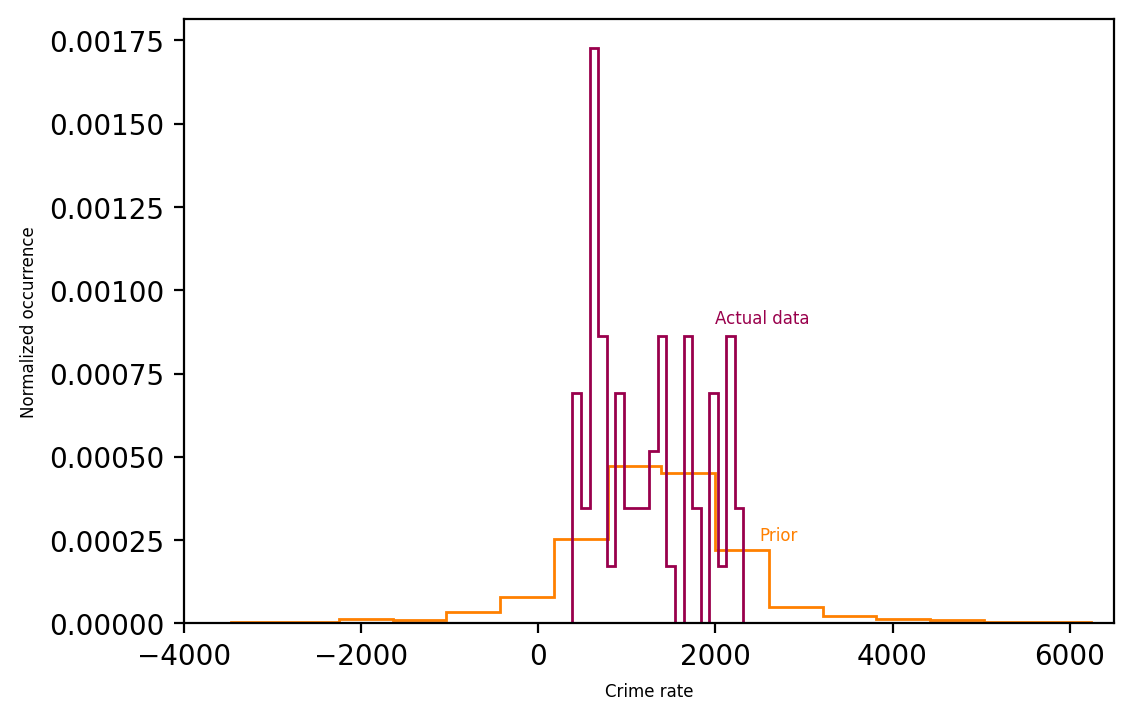

In [13]:
#histogram comparing prior and actual data
plt.hist(burglary_normal_ppc, bins=20, label= "Prior", histtype='step', color = '#ff8000', density = True)
plt.hist(california['Data.Rates.Property.Burglary'], bins=20, label= "Actual data", 
         histtype='step', color = '#99004c', density = True)

plt.xlabel('Crime rate', fontsize = 6)
plt.ylabel('Normalized occurrence', fontsize = 6)
plt.xlim([-4000, 6500])
plt.text(2000, 0.000900, 'Actual data', fontsize = 6, color = '#99004C')
plt.text(2500, 0.00025, 'Prior', fontsize = 6, color = '#FF8000')
plt.show()

<div style="text-align:justify">The prior seems to fit the actual data quite well. It encompases the whole data range, however, is not able to detect the initial peak (crime rate around 700) and the final peak (around 2200). Also range of values is quite big. </div>

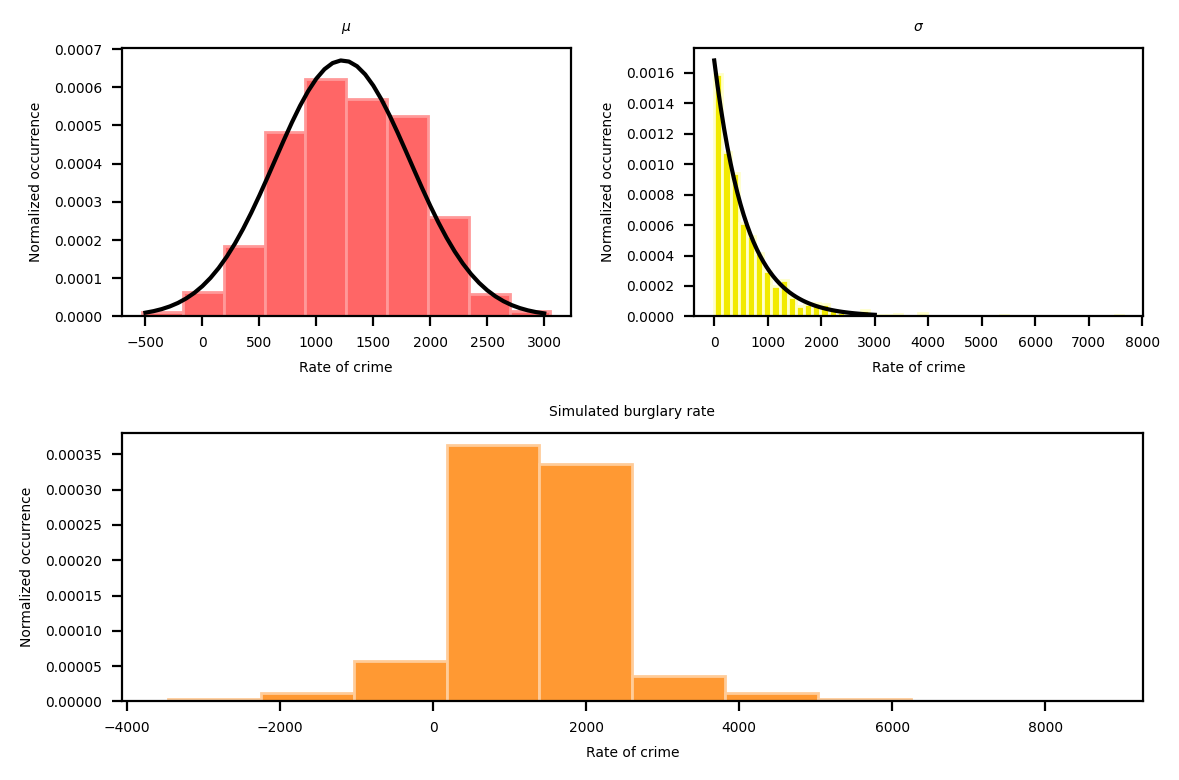

In [14]:
#histograms of mean, standard deviation and burglary rate from the prior - comparison with real data
fig = plt.figure()
plt.rc('xtick', labelsize=5)
plt.rc('ytick', labelsize=5)
plt.rcParams.update()
gs = fig.add_gridspec(2, 2)
ax1 = fig.add_subplot(gs[1, :])
ax1.hist(burglary_normal_ppc, bins = 10, density = True, color = '#ff9933', edgecolor = '#ffcc99')
ax1.set_title('Simulated burglary rate', fontsize=5)
plt.xlabel('Rate of crime', fontsize=5)
plt.ylabel('Normalized occurrence', fontsize=5)

ax2 = fig.add_subplot(gs[0, 0])
ax2.hist(mu_normal_ppc, bins = 10, density = True, color= '#FF6666', edgecolor = '#ff9999')
x = np.linspace(-500, 3000)
y = stats.norm.pdf(x, loc = 1229, scale = 595)
ax2.plot(x, y, 'black')
ax2.set_title('$\mu$', fontsize = 5)
plt.xlabel('Rate of crime', fontsize = 5)
plt.ylabel('Normalized occurrence', fontsize = 5)

ax3 = fig.add_subplot(gs[0, 1])
ax3.hist(sigma_normal_ppc, bins = 50, density = True, color = '#f2ea00', edgecolor = '#ffffcc')
x = np.linspace(0, 3000)
y = stats.expon.pdf(x, scale = 595)
ax3.plot(x, y, color = 'black')
ax3.set_title('$\sigma$', fontsize = 5)
plt.xlabel('Rate of crime', fontsize = 5)
plt.ylabel('Normalized occurrence', fontsize = 5)
fig.tight_layout()
plt.show()

The graphs display the comparison of actual mean and standard deviation distributions with the ones extracted from the prior model. The overall result is quite satisfying. Values of $\mu$ are quite good fitted to the course of the normal model distribution with data from the dataset. The $\sigma$ values does not fit the approximate course, but it looks like the values of standard deviation of the dataset was around 333.

# 3. Normal model - Posterior and inference

The following model hasbeen introduced: 

In [15]:
with open('normal_fit.stan', 'r') as file:
    print(file.read())

data {
    int N;
    real burglaries[N];
}

parameters {
   real mu;
   real <lower = 0> sigma;
}

model {
    mu ~ normal(1300, 600);
    sigma ~ exponential(0.00167);
    burglaries ~ normal(mu, sigma);
}

generated quantities {
    vector[N] log_lik;
    real burglary;
    for (j in 1:N)
    {
        log_lik[j] = normal_lpdf(burglaries[j] | mu, sigma);
    }
    burglary = normal_rng(mu, sigma);
}


In [16]:
normal_fit = CmdStanModel(stan_file = 'normal_fit.stan')
stan_data={"N": len(california), "burglaries": california['Data.Rates.Property.Burglary']}

R = 1000
sim_normal_fit = normal_fit.sample(data=stan_data, iter_sampling = R, 
                             iter_warmup = 1000,
                             fixed_param = False,  
                             chains = 4, seed = 31052022)

mu_normal_fit = sim_normal_fit.stan_variable('mu')
sigma_normal_fit = sim_normal_fit.stan_variable('sigma')
burglary_normal_fit = sim_normal_fit.stan_variable('burglary')

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

INFO:cmdstanpy:CmdStan done processing.


There were no sampling issues.

In [17]:
sim_normal_fit.diagnose()

'Processing csv files: /tmp/tmpv0srvm9n/normal_fit-20220616181900_1.csv, /tmp/tmpv0srvm9n/normal_fit-20220616181900_2.csv, /tmp/tmpv0srvm9n/normal_fit-20220616181900_3.csv, /tmp/tmpv0srvm9n/normal_fit-20220616181900_4.csv\n\nChecking sampler transitions treedepth.\nTreedepth satisfactory for all transitions.\n\nChecking sampler transitions for divergences.\nNo divergent transitions found.\n\nChecking E-BFMI - sampler transitions HMC potential energy.\nE-BFMI satisfactory.\n\nEffective sample size satisfactory.\n\nSplit R-hat values satisfactory all parameters.\n\nProcessing complete, no problems detected.\n'

In [18]:
az.summary(sim_normal_fit)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
mu,1230.769,79.388,1081.340,1379.910,1.328,0.940,3580.0,2643.0,1.0
sigma,601.995,56.446,495.696,707.397,0.999,0.713,3234.0,2316.0,1.0
burglary,1248.229,610.296,164.233,2444.700,9.628,6.808,4015.0,3827.0,1.0


Mean value of the burglary is similar to the mean value of the real data (1229), the same thing with the standard deviation (595). Focusing on those 2 values - model is similar, but taking into account only mean and standard deviation might be misleading. Better way to asses the model performence would be to compare values of the posterior data and actual data on the one histogram with normalized y-axis.

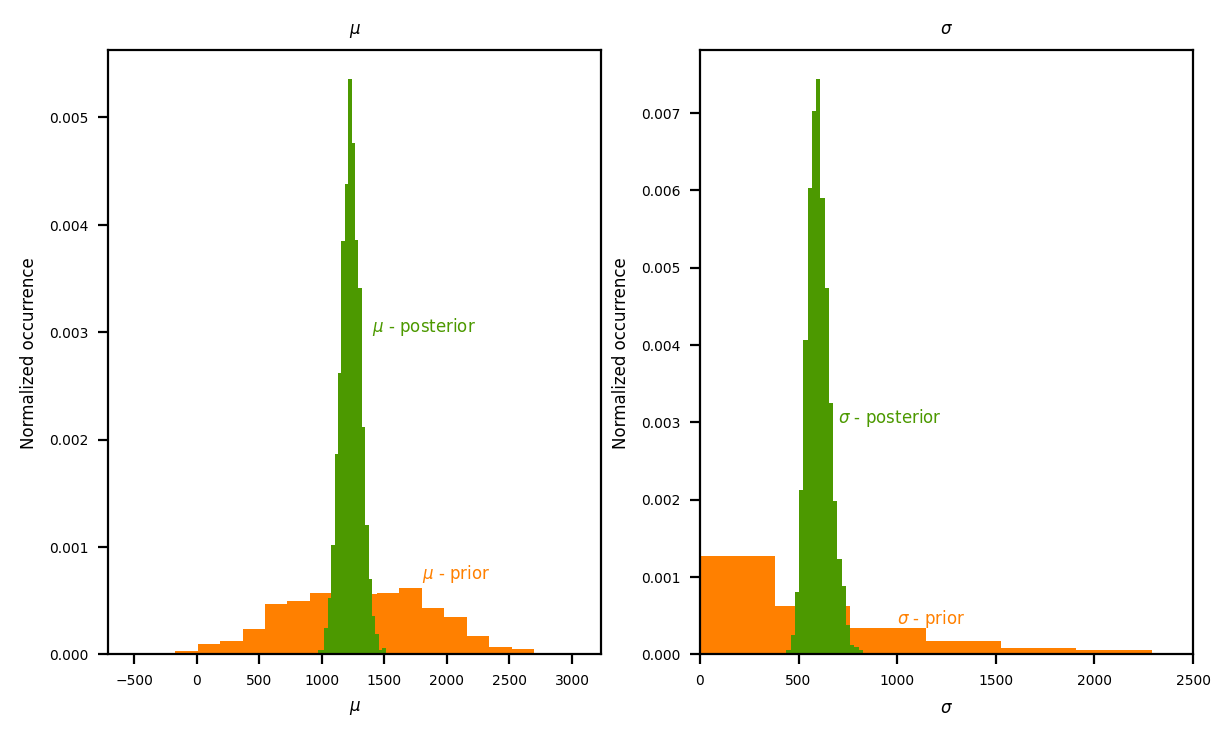

In [92]:
fig, axes = plt.subplots(1, 2, figsize = (7, 4), sharex = False, sharey = False)
ax = axes[0]
ax.hist(mu_normal_ppc, bins = 20, label = 'Prior', density = True, color = '#ff8000')
ax.hist(mu_normal_fit, bins = 20, label = 'Posterior', density = True, color = '#4c9900')
ax.set_title('$\mu$', fontsize = 6)

ax.set_xlabel('$\mu$', fontsize = 6)
ax.set_ylabel('Normalized occurrence', fontsize = 6)
ax.text(1400,0.003, '$\mu$ - posterior', fontsize = 6, color = '#4c9900')
ax.text(1800, 0.0007, '$\mu$ - prior', fontsize = 6, color = '#ff8000')

ax2 = axes[1]
ax2.hist(sigma_normal_ppc, bins = 20, density = True, label = 'Prior', color = '#ff8000')
ax2.hist(sigma_normal_fit, bins = 20, density = True, label = 'Posterior', color = '#4c9900')
ax2.set_title('$\sigma$',fontsize = 6)
ax2.set_xlim([0, 2500])
ax2.set_xlabel('$\sigma$',fontsize = 6)
ax2.set_ylabel('Normalized occurrence',fontsize = 6)
ax2.text(700, 0.003, '$\sigma$ - posterior', fontsize = 6, color = '#4c9900')
ax2.text(1000, 0.0004, '$\sigma$ - prior', fontsize = 6, color = '#ff8000')
plt.show()

Both $\mu$ and $\sigma$ are normally distributed around the set value of the mean (1300) and standard deviation (600) as it results from the parameters set in the model. Observing the histograms it looks as the standard deviation for both variables is similar.

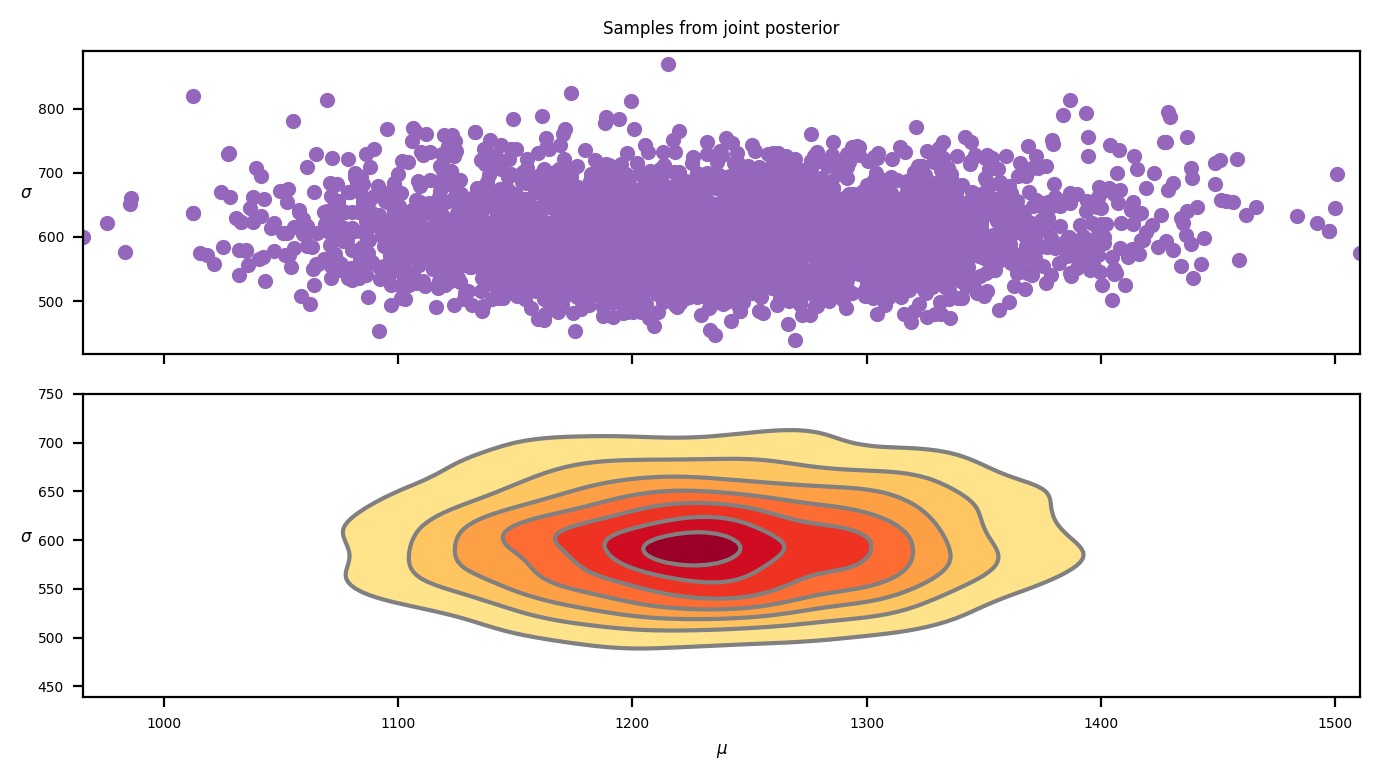

In [21]:
#samples from joint posterior
fig, axes = plt.subplots(2,1, figsize = (7,4), sharex = True)
ax1 = axes[0]
ax1.scatter(mu_normal_fit, sigma_normal_fit, 20,  color = '#9467bd')
ax1.set_ylabel(r'$\sigma$', rotation = 0, fontsize = 6)
ax1.set_title('Samples from joint posterior', fontsize = 6)

ax2 = axes[1]
az.plot_kde(mu_normal_fit, sigma_normal_fit, ax = ax2, contourf_kwargs = {'cmap': 'YlOrRd'})
ax2.set_ylabel(r'$\sigma$', rotation = 0, fontsize = 6)
ax2.set_xlabel(r'$\mu$', fontsize = 6)
fig.tight_layout()
plt.ylim(top = 750)
plt.show()

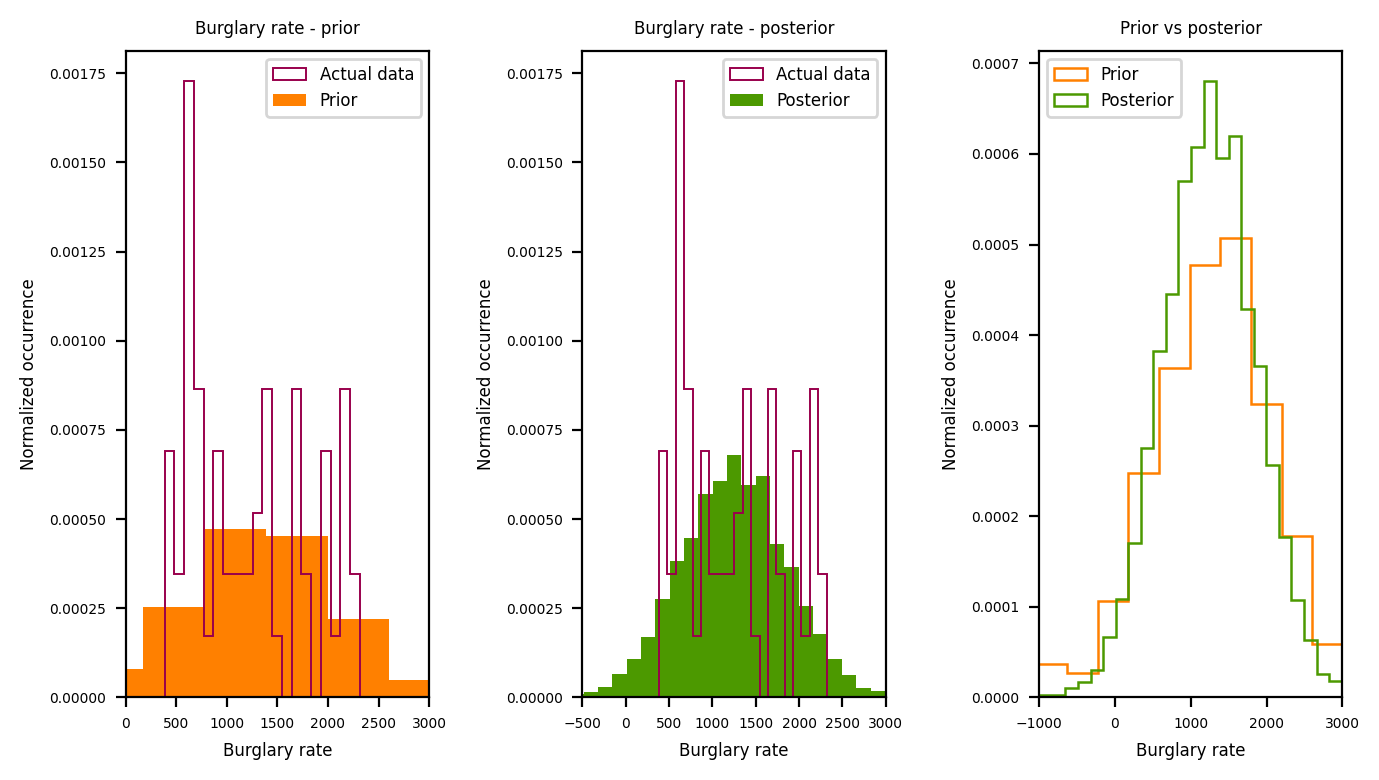

In [106]:
#comparison of observed and predicted burglary rate
fig, axes = plt.subplots(1, 3, figsize = (7, 4), sharex = False, sharey = False)
ax = axes[0]
ax.hist(california['Data.Rates.Property.Burglary'], bins = 20,histtype = 'step', density = True, 
        linewidth= 0.7, color = '#99004c', label = 'Actual data')
ax.hist(burglary_normal_ppc, bins = 20, density = True, color = '#ff8000', label = 'Prior')
ax.set_title('Burglary rate - prior', fontsize = 6)
ax.set_xlim(0, 3000)
ax.set_xlabel('Burglary rate', fontsize = 6)
ax.set_ylabel('Normalized occurrence', fontsize = 6)
ax.legend(prop={'size':6}, loc = 'upper right')

ax2 = axes[1]
ax2.hist(california['Data.Rates.Property.Burglary'], bins = 20, histtype = 'step', color = '#99004c', 
         linewidth= 0.7, density = True, label='Actual data')
ax2.hist(burglary_normal_fit, bins = 30, density = True, color = '#4c9900', label = 'Posterior')
ax2.set_title('Burglary rate - posterior',fontsize = 6)
ax2.set_xlim([-500, 3000])
ax2.set_xlabel('Burglary rate',fontsize = 6)
ax2.set_ylabel('Normalized occurrence',fontsize = 6)
ax2.legend(prop={'size':6}, loc = 'upper right')

ax3 = axes[2]
ax3.hist(burglary_normal_ppc, bins = 30, histtype = 'step', color = '#ff8000', label = 'Prior', 
         linewidth= 0.9, density = True)
ax3.hist(burglary_normal_fit, bins = 30, density = True, label = 'Posterior', histtype='step',
         color = '#4c9900', linewidth= 0.9)

ax3.set_title('Prior vs posterior', fontsize = 6)

ax3.set_xlim([-1000, 3000])
ax3.set_xlabel('Burglary rate', fontsize = 6)
ax3.set_ylabel('Normalized occurrence', fontsize = 6)
ax3.legend(prop={'size':6}, loc = 'upper left')

fig.tight_layout()
plt.show()

The posterior data seem to be slightly better fitted than the prior data, yet they range is bigger (-500, 3100). However, judging from the histogram, the distant values do not play a big role. The peak in the actual data is still not detected by the normal model. Peak in Normal model is slightly shifted to right (due to setting the values in $\mu$ to 1300 and 600).

<div style='text-align:justify'>The posterior shows a typical normal distrbution shape, whereas the actual data histogram does not fit it well. The model is not able to show the higher values around the rate of 700 and smaller or none around the rates of 1500 and 2000. The posterior data encompases wider data range, proposing also minus crime rates. Thus, normal distribution model does not seem to be able to model this phenomenon. It would better fit if its shape were more positively-skewed and the mean value was shifted towards the left, at around 750 (but that is not the actual mean value of this crime rate). </div>

# 4. Linear model - Prior predictive check

<div style='text-align:justify'>To improve the analysis of the crime rates in California, a linear model is introduced. It predicts burglary rate, using predictor of larceny rate. Research showed that the mean value and standard deviation of larceny rate in California are 1300 and 600, consequently. They were used to construct an alpha parameter. The predictor is centered by substracting the mean value of larceny rate calculated from the actual data. </div>

In [23]:
california['c_Data.Rates.Property.Larceny'] = (california['Data.Rates.Property.Larceny'] - california['Data.Rates.Property.Larceny'].mean())
california.head()

/tmp/ipykernel_18611/3045216782.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  california['c_Data.Rates.Property.Larceny'] = (california['Data.Rates.Property.Larceny'] - california['Data.Rates.Property.Larceny'].mean())


,State,Year,Data.Population,Data.Rates.Property.All,Data.Rates.Property.Burglary,Data.Rates.Property.Larceny,Data.Rates.Property.Motor,Data.Rates.Violent.All,Data.Rates.Violent.Assault,Data.Rates.Violent.Murder,...,Data.Totals.Property.All,Data.Totals.Property.Burglary,Data.Totals.Property.Larceny,Data.Totals.Property.Motor,Data.Totals.Violent.All,Data.Totals.Violent.Assault,Data.Totals.Violent.Murder,Data.Totals.Violent.Rape,Data.Totals.Violent.Robbery,c_Data.Rates.Property.Larceny
240,California,1960,15717204,3235.4,910.5,1984.8,340.1,239.0,119.6,3.9,...,508511,143102,311956,53453,37558,18796,616,2859,15287,-636.175
241,California,1961,16397000,3177.5,894.2,1950.6,332.7,232.7,120.0,3.7,...,521008,146615,319834,54559,38154,19684,605,3033,14832,-670.375
242,California,1962,16970000,3326.2,934.1,2052.9,339.2,234.8,121.7,3.9,...,564451,158523,348373,57555,39846,20645,657,2946,15598,-568.075
243,California,1963,17590000,3545.8,998.9,2184.7,362.2,241.2,126.3,3.8,...,623709,175703,384289,63717,42419,22208,673,3080,16458,-436.275
244,California,1964,18084000,3874.3,1088.7,2366.5,419.1,265.6,138.2,4.1,...,700630,196883,427960,75787,48026,24998,740,3621,18667,-254.475


In [24]:
with open('linear_ppc.stan', 'r') as file:
    print(file.read())

data {
   int N;
   real larceny[N];
}

generated quantities {
   real alpha = normal_rng(1300, 600);
   real beta = lognormal_rng(0,1);
   real <lower = 0> sigma = exponential_rng(0.00167);
   real <lower = 0> burglary[N];
   for (i in 1:N) {
      burglary[i] = normal_rng(larceny[i]*beta + alpha, sigma);
   }
}


In [25]:
normal_model1 = CmdStanModel(stan_file = 'linear_ppc.stan')
stan_data={'N': len(california["Data.Rates.Property.Larceny"]),
           "larceny": np.linspace(california["c_Data.Rates.Property.Larceny"].min(),
                                  california["c_Data.Rates.Property.Larceny"].max(), num = 60)}

R = 1000
sim_linear_ppc = normal_model1.sample(data=stan_data, iter_sampling = R, 
                             iter_warmup = 0,
                             chains = 1,
                             fixed_param = True,
                             seed = 31052022)

alpha_linear_ppc = sim_linear_ppc.stan_variable('alpha')
beta_linear_ppc = sim_linear_ppc.stan_variable('beta')
sigma_linear_ppc = sim_linear_ppc.stan_variable('sigma')
burglary_linear_pcc = sim_linear_ppc.stan_variable('burglary')

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

INFO:cmdstanpy:CmdStan done processing.


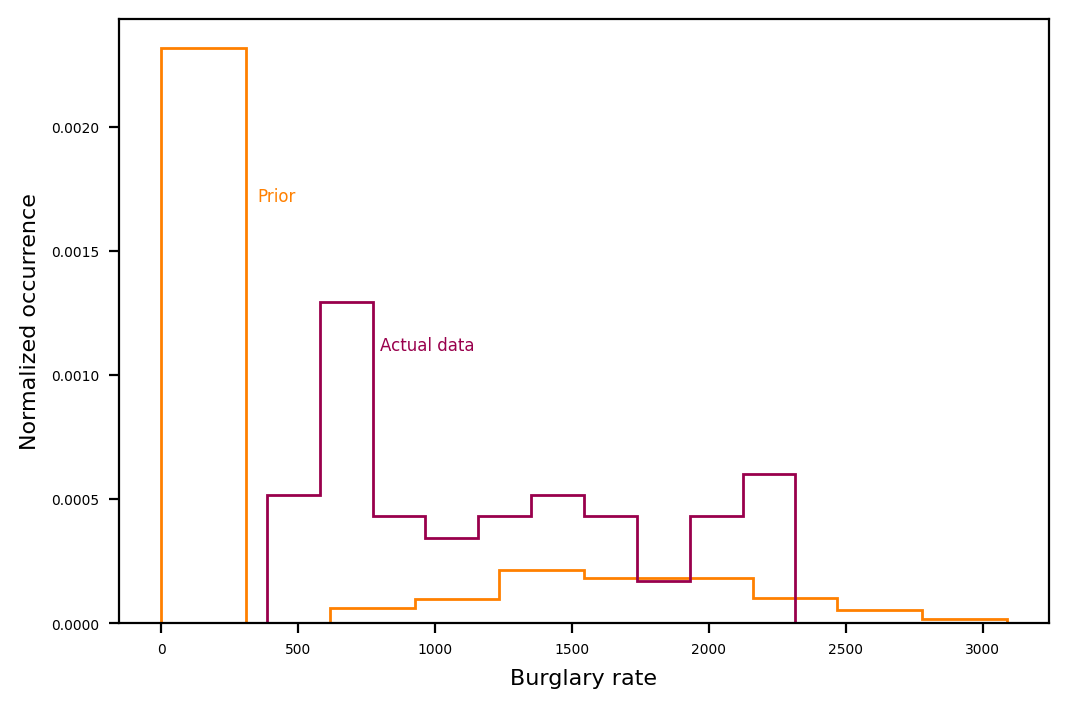

In [26]:
#histograms comparing prior and actual data
burglary_mean_ppc = np.mean(burglary_linear_pcc, axis = 1)
plt.hist(burglary_mean_ppc, bins=10, label= "Prior", histtype='step', density = True, color = '#ff8000')
plt.hist(california['Data.Rates.Property.Burglary'], bins=10, label= "Actual data", histtype='step',
         color = '#99004c', density = True)

plt.text(350, 0.0017, 'Prior', fontsize = 6, color = '#ff8000')
plt.text(800, 0.0011, 'Actual data', fontsize = 6, color = '#99004c')
plt.xlabel('Burglary rate', fontsize = 8)
plt.ylabel('Normalized occurrence', fontsize = 8)
plt.show()

The prior is able to detect the initial peak (at around 700), yet is is shifted to much to the left.

Text(0, 0.5, 'Simulated burglary rate')

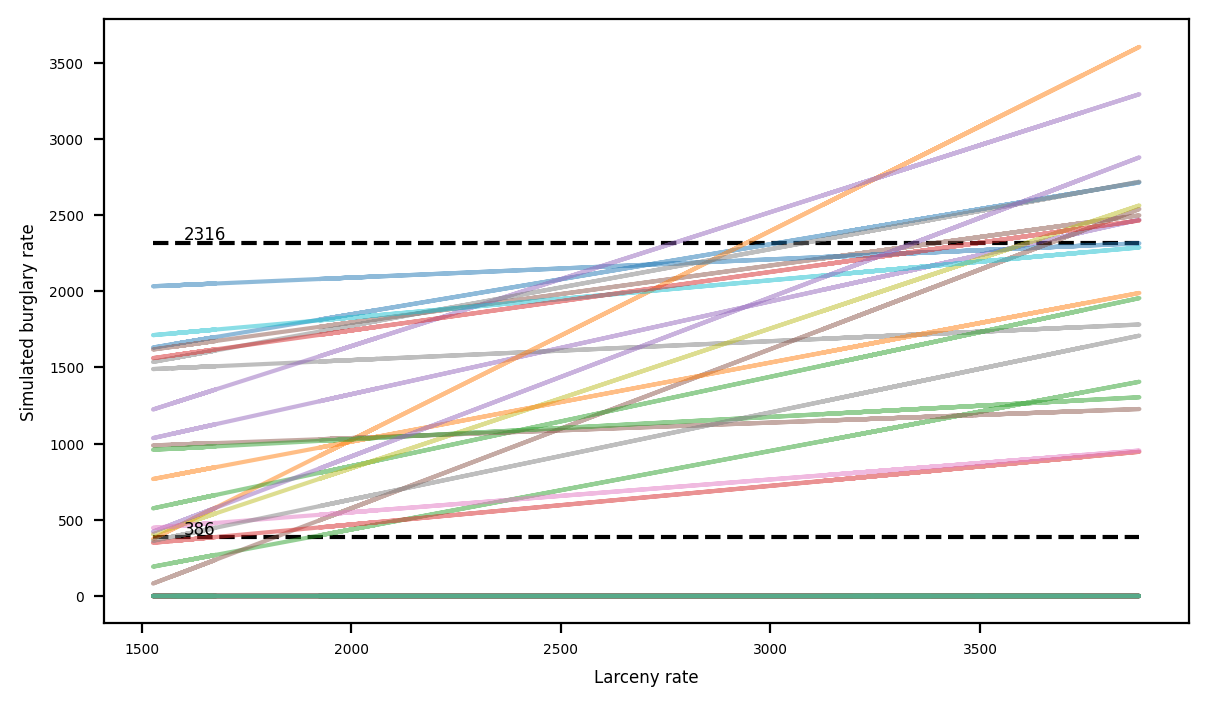

In [27]:
fig, axes = plt.subplots(1,1, figsize = (7,4))
axes.hlines([386, 2316], xmin = california['Data.Rates.Property.Larceny'].min(), 
            xmax = california['Data.Rates.Property.Larceny'].max(), linestyle = '--', color = 'black')
for i in range(60):
    axes.plot(california['Data.Rates.Property.Larceny'], 
              alpha_linear_ppc[i] + beta_linear_ppc[i]*california['c_Data.Rates.Property.Larceny'], alpha = 0.5)
    
axes.text(1600, 2340, '2316', fontsize = 6)
axes.text(1600, 405, '386', fontsize = 6)
axes.set_xlabel('Larceny rate', fontsize = 6)
axes.set_ylabel('Simulated burglary rate', fontsize = 6)

It is visible that for smaller values of larceny rates, smaller values of burglary rates are proposed. Most of the lines fall into the range [386, 2316] of burglary rates .

# 5. Linear model - posterior 

In [28]:
with open('linear_fit.stan', 'r') as file:
    print(file.read())

data {
   int N;
   vector[N] larceny;
   real burglaries[N];
}

parameters {
   real alpha;
   real beta;
   real <lower=0> sigma;
}

transformed parameters {
   vector[N] mu = larceny*beta+alpha;
}

model {
   alpha ~ normal(1300, 600);
   beta ~ lognormal(0, 1);
   sigma ~ exponential(0.00167);
   burglaries ~ normal(mu, sigma);
}

generated quantities {
   array [N] real burglary;
   vector[N] log_lik;
   for (i in 1:N) {
       burglary[i] = normal_rng(mu[i], sigma);
       log_lik[i] = normal_lpdf(burglaries[i] | mu[i], sigma);
   }
}


In [29]:
linear_fit_model = CmdStanModel(stan_file = 'linear_fit.stan')
stan_data={'N': len(california["Data.Rates.Property.Larceny"]), "larceny": 
           california["c_Data.Rates.Property.Larceny"],
           "burglaries": california["Data.Rates.Property.Burglary"] }


R = 1000
sim_linear_fit = linear_fit_model.sample(data=stan_data, iter_sampling = R, 
                             iter_warmup = 1000,
                             fixed_param=False,
                             chains = 4,
                             seed = 31052022) 

alpha_linear_fit = sim_linear_fit.stan_variable('alpha')
beta_linear_fit = sim_linear_fit.stan_variable('beta')
sigma_linear_fit = sim_linear_fit.stan_variable('sigma')
burglary_linear_fit = sim_linear_fit.stan_variable('burglary')

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

INFO:cmdstanpy:CmdStan done processing.


In [30]:
sim_linear_fit.diagnose()

'Processing csv files: /tmp/tmpv0srvm9n/linear_fit-20220616181924_1.csv, /tmp/tmpv0srvm9n/linear_fit-20220616181924_2.csv, /tmp/tmpv0srvm9n/linear_fit-20220616181924_3.csv, /tmp/tmpv0srvm9n/linear_fit-20220616181924_4.csv\n\nChecking sampler transitions treedepth.\nTreedepth satisfactory for all transitions.\n\nChecking sampler transitions for divergences.\nNo divergent transitions found.\n\nChecking E-BFMI - sampler transitions HMC potential energy.\nE-BFMI satisfactory.\n\nEffective sample size satisfactory.\n\nSplit R-hat values satisfactory all parameters.\n\nProcessing complete, no problems detected.\n'

In [31]:
az.summary(sim_linear_fit)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
alpha,1229.078,22.191,1187.720,1270.660,0.379,0.268,3463.0,2542.0,1.0
beta,0.732,0.029,0.675,0.784,0.000,0.000,3822.0,2892.0,1.0
sigma,170.132,15.764,140.755,198.962,0.275,0.196,3313.0,2957.0,1.0
mu[0],763.133,28.566,708.616,814.659,0.491,0.349,3435.0,2523.0,1.0
mu[1],738.084,29.195,683.424,791.622,0.502,0.356,3440.0,2490.0,1.0
...,...,...,...,...,...,...,...,...,...
burglary[55],535.384,177.952,218.251,879.222,2.793,1.975,4052.0,3587.0,1.0
burglary[56],501.324,174.863,189.156,837.211,2.997,2.119,3396.0,3832.0,1.0
burglary[57],499.755,176.090,170.335,831.316,2.770,1.977,4044.0,3687.0,1.0
burglary[58],459.553,175.858,123.374,786.074,2.751,1.950,4096.0,3968.0,1.0


Text(1700, 410, '386')

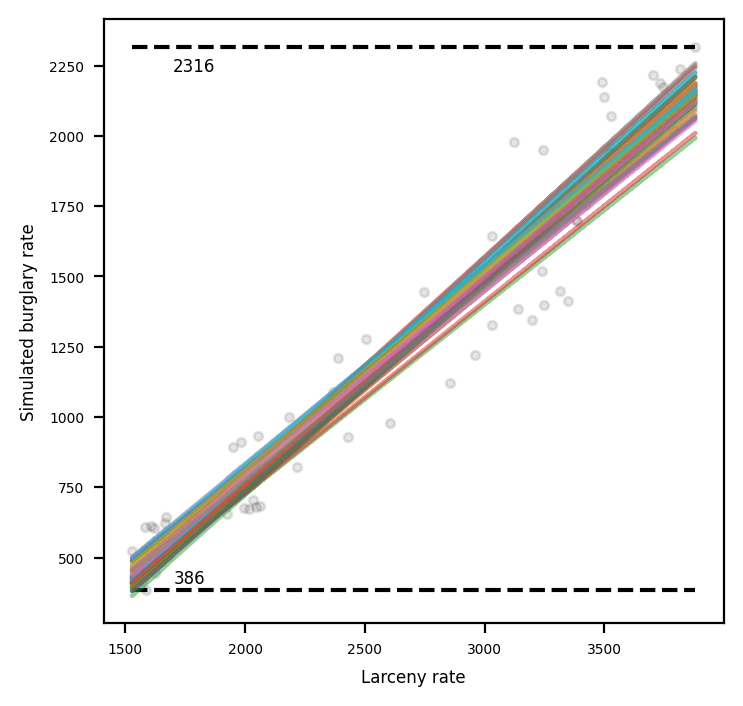

In [32]:
fig, axes = plt.subplots(1,1, figsize = (4,4))
axes.hlines([386, 2316], xmin = california['Data.Rates.Property.Larceny'].min(), 
            xmax = california['Data.Rates.Property.Larceny'].max(), linestyle = '--', color = 'black')
for i in range(60):
    axes.plot(california['Data.Rates.Property.Larceny'], 
              alpha_linear_fit[i] + beta_linear_fit[i]*california['c_Data.Rates.Property.Larceny'], alpha = 0.5)
axes.scatter(california['Data.Rates.Property.Larceny'], california['Data.Rates.Property.Burglary'], 
             color = 'black', alpha = 0.1, s=10)
axes.set_xlabel('Larceny rate', fontsize = 6)
axes.set_ylabel('Simulated burglary rate', fontsize = 6)
axes.text(1700, 2230, '2316', fontsize = 6)
axes.text(1700, 410, '386', fontsize = 6)

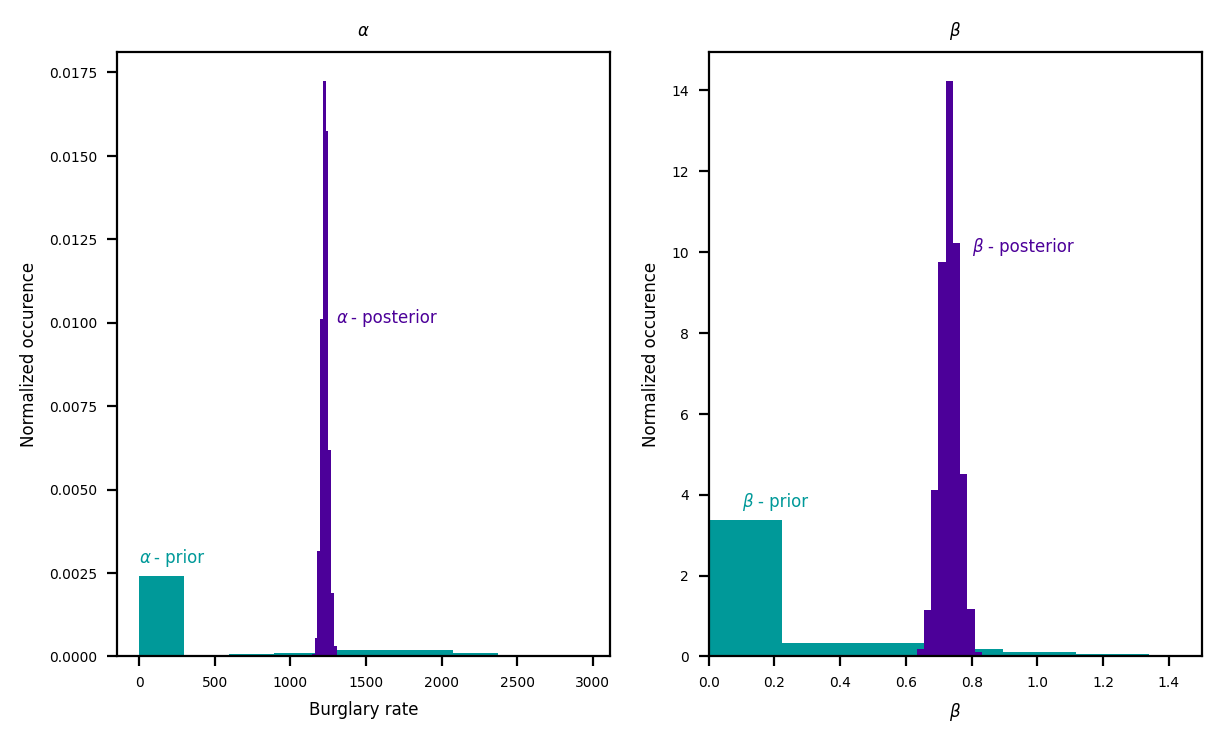

In [33]:
fig, axes = plt.subplots(1, 2, figsize=(7,4))
ax = axes[0]
ax.hist(alpha_linear_ppc, bins = 10, label = 'Prior',color = '#009999' ,density = True, linewidth = 0.5)
ax.hist(alpha_linear_fit, bins = 10, label = 'Posterior',color = '#4c0099' ,density = True)
ax.set_xlabel('Burglary rate', fontsize = 6)
ax.set_ylabel('Normalized occurence', fontsize = 6)
ax.set_title(r'$\alpha$', fontsize = 6)
ax.text(1300, 0.01, r'$\alpha$', fontsize = 6, color = '#4c0099')
ax.text(1400, 0.01, '- posterior', fontsize = 6, color = '#4c0099')
ax.text(0, 0.0028, r'$\alpha$', fontsize = 6, color = '#009999')
ax.text(100, 0.0028, '- prior', fontsize = 6, color = '#009999')
ax2.set_xlim([0, 2500])

ax2 = axes[1]
ax2.hist(beta_linear_ppc, bins = 10, label = 'Prior',color = '#009999' ,density = True, linewidth = 0.5)
ax2.hist(beta_linear_fit, bins = 10, density = True, label = 'Posterior', color = '#4c0099')
ax2.set_title(r'$\beta$', fontsize = 6)
ax2.set_xlabel(r'$\beta$', fontsize = 6)
ax2.set_ylabel('Normalized occurence', fontsize = 6)

ax2.text(0.8, 10, r'$\beta$', fontsize = 6, color = '#4c0099')
ax2.text(0.85, 10, '- posterior', fontsize = 6, color = '#4c0099')

ax2.text(0.1, 3.7, r'$\beta$', fontsize = 6,color='#009999')
ax2.text(0.15, 3.7, '- prior', fontsize = 6,color='#009999')
ax2.set_xlim([0, 1.5])
plt.show()

# NIE WIEM O CO CODZILO Z WYKRESEM KROPEK ALFY VS COS

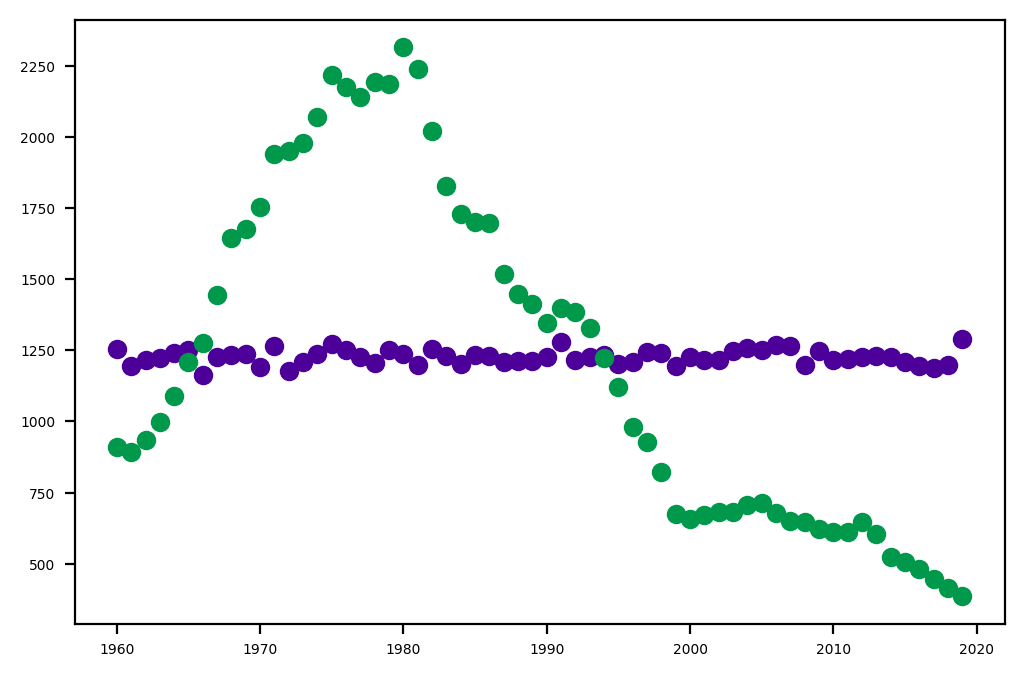

In [76]:
fig, ax = plt.subplots(1,1)
x = np.linspace(1960, 2019, num = 60)
ax.scatter(x,alpha_linear_fit[1000:1060], label = 'Posterior',color = '#4c0099')
ax.scatter(data=california, x = 'Year', y = 'Data.Rates.Property.Burglary', color = '#00994C')

In [84]:
len(alpha_linear_fit[0])

TypeError: object of type 'numpy.float64' has no len()

# ROZDZIELIĆ WYKRESY (alfa ze średnią z poszczególnych czegoś)

In [65]:

light = "#E0FFFF"
light_highlight = "#AFEEEE"
mid = "#40E0D0"
mid_highlight = "#48D1CC"
dark = "#0000FF"
dark_highlight = "#6495ED"
green = "#008000"
light_grey = "#DDDDDD"
import warnings
def is_sorted(a):
    '''Check if numpy 1d-array is sorted
    '''
    if type(a) != np.ndarray:
        raise TypeError('Argument must be a numpy array but is {}'.format(type(a)))
    if len(a.shape) > 1:
        raise ValueError('Array must be 1 dimensional but has shape {}'.format(a.shape))
    return np.all(a[:-1] <= a[1:])

def sort_1d_array_and_2d_array_by_1d_array(x, fx):
    if (type(x) != np.ndarray) or (type(fx) != np.ndarray):
        raise TypeError('At least one of the arguments is not a numpy array; type(x)={}, type(fx)={}'.format(type(x), type(fx)))
    if len(x) != fx.shape[1]:
        raise ValueError('2d array number of columns is not matching the 1d array. Expected {}, got {}'.format(len(x), fx.shape[1]))
    arr2D = np.concatenate([np.expand_dims(x, axis = 0), fx], axis = 0)
    sortedArr = arr2D[:, arr2D[0].argsort()]
    return sortedArr[0, :], sortedArr[1:, :]

def get_quantiles(fx, probs = None):
    if probs is None:
        probs = [10, 20, 30, 40, 50, 60, 70, 80, 90]
    if len(probs) % 2 == 0:
        raise ValueError('Number of quantiles must be even')
    if len(probs) > 11:
        raise ValueError('Too many quantiles (max is 11)')
    if probs[int(len(probs)/2)] != 50:
        raise ValueError('Middle quantile should be 50 but is {}'.format(probs(int(len(probs)/2))))
    return np.percentile(fx, probs, axis=0)
def ribbon_plot(x, fx, ax = None, zorder = 0, probs = None, supress_warning = False):
    '''Plot a ribbon plot for regression and similar.
    Plot consists of quantiles (by 10%) of a variate (fx) as a function of covariate (x).
    x has shape (n, )
    fx has shape (N, n)
    '''
    if ax is None:
        ax = plt.gca()
    if not is_sorted(x):
        x, fx = sort_1d_array_and_2d_array_by_1d_array(x, fx)
    if (len(set(x)) != len(x)) and (not supress_warning):
        warnings.warn("x variable has repeated values, which can influence the plot")    
    perc_interv = get_quantiles(fx, probs)
    nq = perc_interv.shape[0]
    colortab = [light, light_highlight, mid, mid_highlight, dark, dark_highlight]

    for i in range(int(nq/2)):
        ax.fill_between(x,
                        perc_interv[i,:],
                        perc_interv[-(i+1),:],
                        color = colortab[i],
                        zorder = zorder)
    ax.plot(x, perc_interv[int(nq/2),:], color = colortab[int(nq/2)], zorder = zorder)
    return ax

# RIBBON PLOT -> NWM JAKI TYTUL I CZY TO WGL JEST DOBRZE

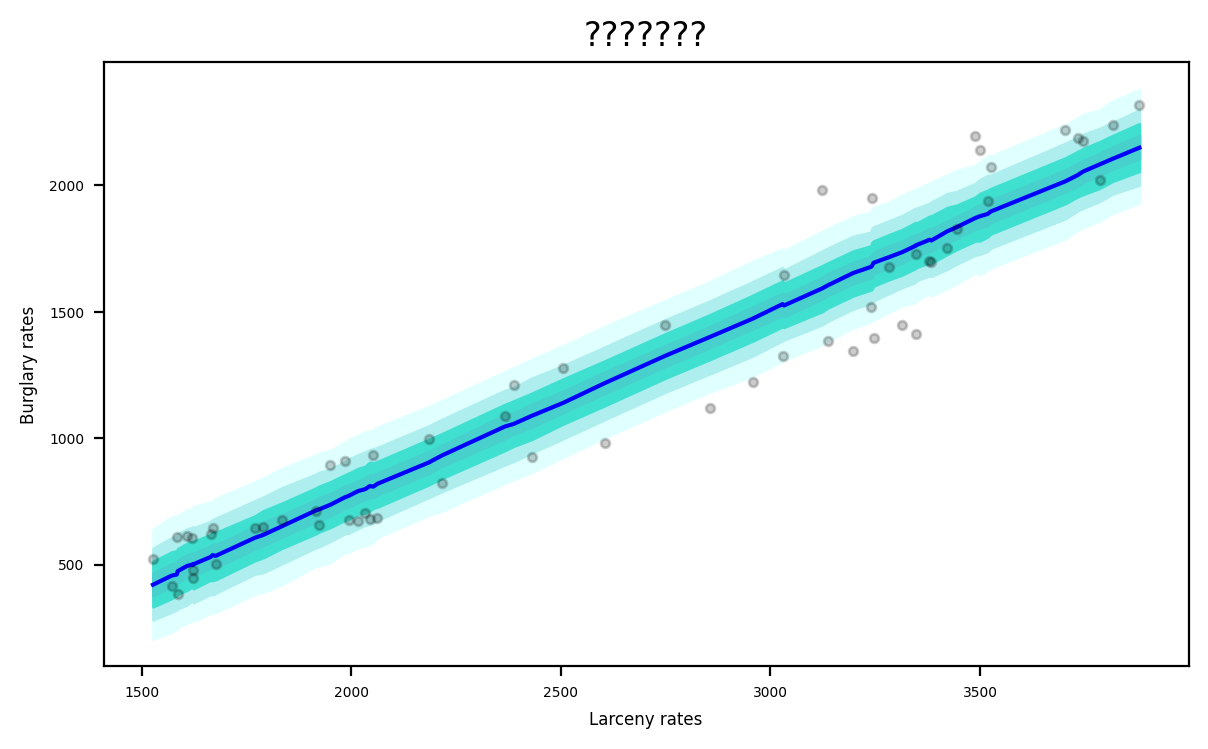

In [73]:
fig, axes = plt.subplots(1, 1, figsize = (7, 4))
x_axis =np.array(california['Data.Rates.Property.Larceny'])

axes = ribbon_plot(x_axis, burglary_linear_fit, axes, supress_warning = True)

axes.scatter(california['Data.Rates.Property.Larceny'],california['Data.Rates.Property.Burglary'],
             color='black', alpha = 0.2, s=10)
axes.set_xlabel('Larceny rates', fontsize = 6)
axes.set_ylabel('Burglary rates', fontsize = 6)
axes.set_title('???????')
plt.show()

The plots of $\alpha$ and $\beta$ parameter show that both parameters are concise and have a normal distribution. 

In [37]:
# fit_id = az.from_cmdstanpy(posterior=sim_linear_fit, log_likelihood = 'log_lik', posterior_predictive='burglary',
#                            observed_data={'burglaries':california["Data.Rates.Property.Burglary"]})

# ax=az.plot_ppc(data=fit_id, alpha = 0.1,colors = ['#0080F0', 'blue', '#0066cc'], 
#                data_pairs={'burglaries':'burglary'}, num_pp_samples=100, observed=False, textsize = 4)
# plt.hist(california['Data.Rates.Property.Burglary'], bins=10, label= "Actual data", histtype='step',
#          color = '#99004c', density = True)

# ax.set_title('Posterior predictive check - larceny predictor', fontsize = 5)
# ax.legend(prop={'size':6})

The posterior predictive samples form an almost symmetrical graph with two peaks - at around 600 and 1700 burglary rates. It seems to try to model the peak in the actual data at around 600, yet the result could have been better. The second peak in the posterior samples probably mirrors the second peak, but is a bit skewed to the left. The overall result is not very precise, yet seems to be not that far away from the actual data. 

# 6. Model comparison

In [38]:
fit_normal_id = az.from_cmdstanpy(posterior = sim_normal_fit, log_likelihood = 'log_lik', 
                                 posterior_predictive = 'burglary', 
                                  observed_data ={'burglaries':california['Data.Rates.Property.Burglary']} )


fit_linear_id = az.from_cmdstanpy(posterior=sim_linear_fit, log_likelihood = 'log_lik', 
                                  posterior_predictive='burglary',
                                   observed_data={'burglaries':california["Data.Rates.Property.Burglary"]})


/home/kasia/.local/lib/python3.8/site-packages/arviz/stats/stats.py:248: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ics = ics.append([ic_func(dataset, pointwise=True, scale=scale, var_name=var_name)])
/home/kasia/.local/lib/python3.8/site-packages/arviz/stats/stats.py:248: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ics = ics.append([ic_func(dataset, pointwise=True, scale=scale, var_name=var_name)])


Text(0.5, 1.0, 'WAIC comparision')

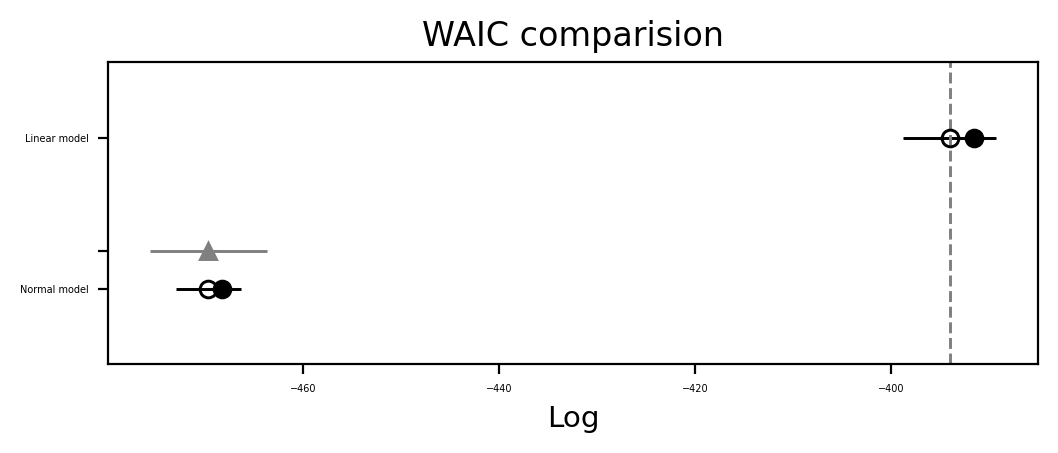

In [39]:

compare_dict = {'Normal model': fit_normal_id,'Linear model': fit_linear_id}
model_compare_waic = az.compare(dataset_dict=compare_dict, ic='waic')
az.plot_compare(model_compare_waic)
plt.title('WAIC comparision')


/home/kasia/.local/lib/python3.8/site-packages/arviz/stats/stats.py:248: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ics = ics.append([ic_func(dataset, pointwise=True, scale=scale, var_name=var_name)])


              rank         loo     p_loo      d_loo        weight        se  \
Linear model     0 -394.018257  2.467022   0.000000  1.000000e+00  4.731763   
Normal model     1 -469.658938  1.416077  75.640681  1.975309e-12  3.360758   

                   dse  warning loo_scale  
Linear model  0.000000    False       log  
Normal model  5.923624    False       log  


/home/kasia/.local/lib/python3.8/site-packages/arviz/stats/stats.py:248: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ics = ics.append([ic_func(dataset, pointwise=True, scale=scale, var_name=var_name)])


Text(0.5, 1.0, 'LOO comparison')

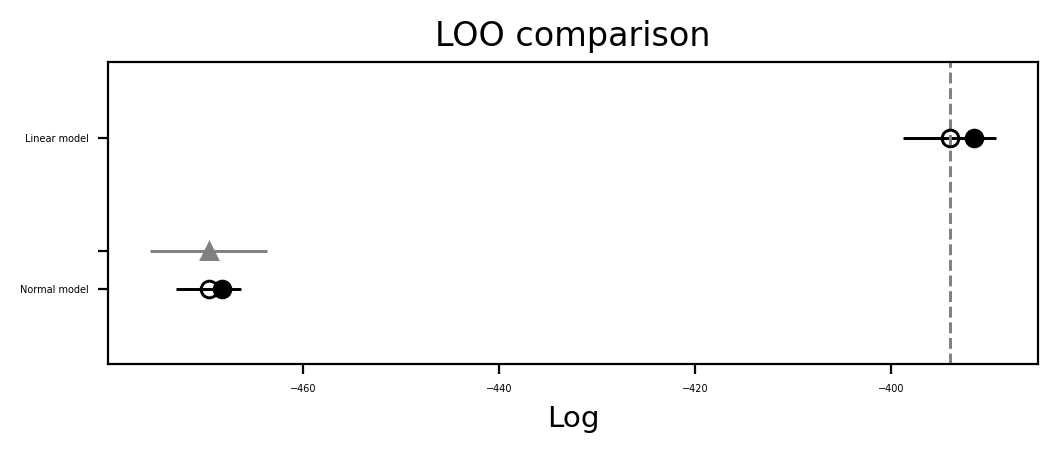

In [40]:
model_compare_loo = az.compare(compare_dict, ic="loo", method="stacking", scale="log")

print(model_compare_loo.head())
az.plot_compare(model_compare_loo)
plt.title('LOO comparison')

An information criterion is a measure of the quality of a statistical model. It takes into account:
<br>
-how well the model fits the data
<br>
-the complexity of the model.

Both WAIC and LOO comparison shows that the normal model better fits the data. The uncertainity of the value for normal model is negligible (not visible on the graph) - for the Linear model the uncertainity is much bigger. The black bar informs about the in sample prediction (referse to the data that we have) - for Normal model that uncertainity is much smaller than for the Linear model. For the out of sample data (data we don't have but want to forecast or estimate) - the Normal model is still better, the uncertainity of the forecast values are aiming for 0. For the Linear model the value is bigger. It means that the Normal model is better suit for the dataset and the forecast.
<br>
<br>
The warnings are about the values that might be different from all dataset. It informs also that the algorithm has issue when values are bigger than 0.4 (WAIC) and 0.7 (LOO) for certain samples.

As authors we agree with the information criteria. The normal model seems to be better due to the spline shape of the real data. The model which will map the data better is the model with the spline - describing the higher order equation (e.g. fourth order polynomial).
<br>
Overall the Normal model is better due to modelling the wider range of values. The Linear model is mainily focusing on the values which are around 1250 (which is a value similar to the mean of the dataset).